<a href="https://colab.research.google.com/github/umutcanc7/DSA210-PROJECT-/blob/main/Analysis_of_matchdays_and_step_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing the relationship between matchdays and step counts

This code processes step count data and match data to analyze the relationship between daily step counts and matchdays. It converts date columns into a unified format, adds a column indicating matchdays, and merges the datasets to include match details alongside step counts.
A box plot is generated to visualize the difference in step counts between matchdays and non-matchdays, and the combined dataset is saved for further analysis or sharing.

## Boxplot
The box plot shows the distribution of step counts for matchdays and non-matchdays, highlighting differences in their medians, spreads, and outliers. It allows us to assess whether step counts are generally higher, more variable, or have distinct patterns on matchdays compared to non-matchdays.Box plot shows that step counts on non-matchdays have a slightly higher median and greater variability compared to matchdays, with more extreme outliers. Matchdays exhibit more consistent step counts, suggesting that daily activity levels might be steadier on these days.

<ipython-input-8-0a9aee66d6d7>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Matchday', y='Total Steps', data=combined_data, palette="Set2")


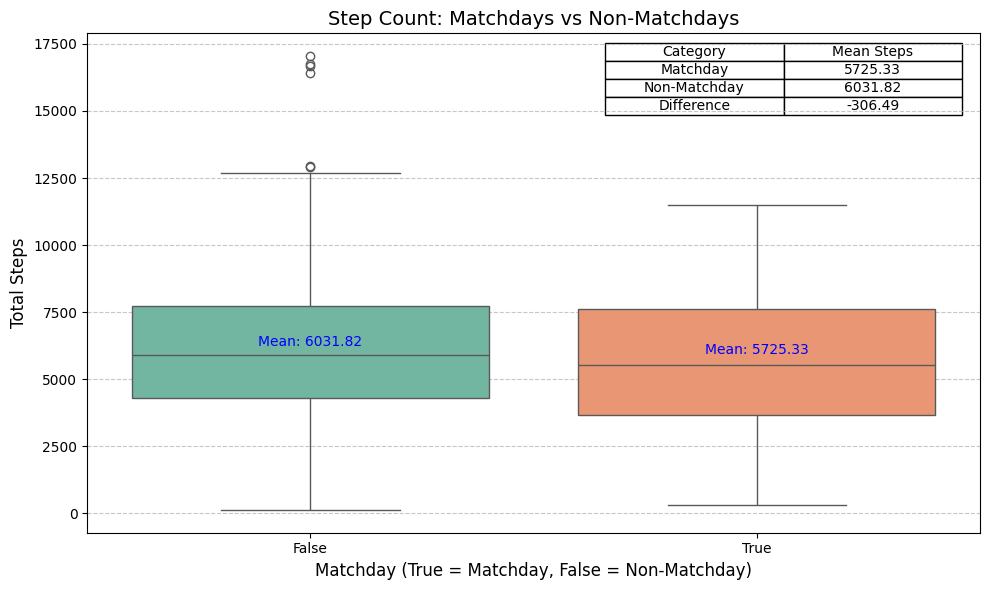

Combined data saved as 'combined_step_match_data.csv'.


In [ ]:
# This script analyzes the relationship between daily step counts and matchdays.
# This analysis tests whether daily step counts are influenced by matchdays and match outcomes. The null hypothesis (H₀) assumes no significant impact, while the alternative hypothesis (H₁) posits that matchdays and outcomes significantly affect step counts, with increased steps on matchdays and more steps following wins than losses. The script processes step count data and match data, identifies matchdays, and merges both datasets. A box plot is generated to compare step counts on matchdays versus non-matchdays, and the combined dataset is saved for further analysis.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Calculate observed means
matchday_mean = combined_data[combined_data['Matchday'] == True]['Total Steps'].mean()
non_matchday_mean = combined_data[combined_data['Matchday'] == False]['Total Steps'].mean()
observed_diff = matchday_mean - non_matchday_mean

# Visualize step counts for matchdays vs. non-matchdays
plt.figure(figsize=(10, 6))
sns.boxplot(x='Matchday', y='Total Steps', data=combined_data, palette="Set2")
plt.title('Step Count: Matchdays vs Non-Matchdays', fontsize=14)
plt.xlabel('Matchday (True = Matchday, False = Non-Matchday)', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add observed means as indicators
plt.text(0, non_matchday_mean + 200, f"Mean: {non_matchday_mean:.2f}", horizontalalignment='center', color='blue')
plt.text(1, matchday_mean + 200, f"Mean: {matchday_mean:.2f}", horizontalalignment='center', color='blue')

# Add a table for differences
table_data = [["Category", "Mean Steps"], ["Matchday", f"{matchday_mean:.2f}"], ["Non-Matchday", f"{non_matchday_mean:.2f}"], ["Difference", f"{observed_diff:.2f}"]]
plt.table(cellText=table_data, loc="upper right", cellLoc="center", colWidths=[0.2, 0.2])

plt.tight_layout()
plt.show()

# Save combined data to a CSV file if needed
combined_data.to_csv('combined_step_match_data.csv', index=False)
print("Combined data saved as 'combined_step_match_data.csv'.")


## Randomized test with step count and match data to find p-value

We are going to loog at diffrence in means interval to find p-value.İf our p-value greater than 0.05 we fail to reject H0. İf it is less we reject H0 in favor HA:matchdays and step counts has a positive correlation.

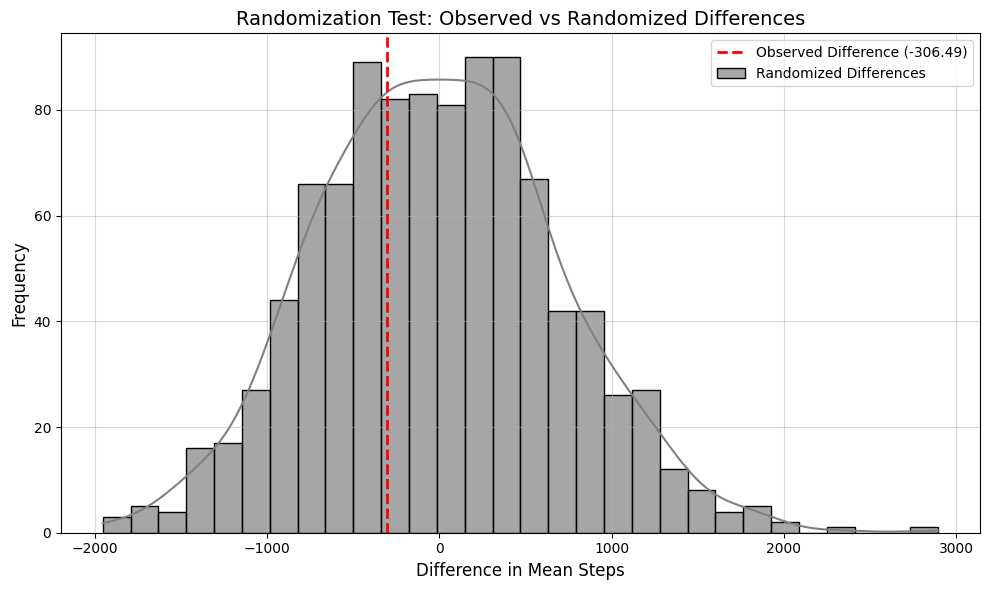

Observed Difference: -306.49
P-value: 0.6803
Conclusion: We fail to reject the null hypothesis (H₀). There is no significant correlation between matchdays and step counts.


In [ ]:
# This script analyzes the relationship between daily step counts and matchdays.
# This analysis tests whether daily step counts are influenced by matchdays and match outcomes. The null hypothesis (H₀) assumes no significant impact, while the alternative hypothesis (H₁) posits that matchdays and outcomes significantly affect step counts, with increased steps on matchdays and more steps following wins than losses. The script processes step count data and match data, identifies matchdays, and merges both datasets. A box plot is generated to compare step counts on matchdays versus non-matchdays, and the combined dataset is saved for further analysis.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Calculate observed means
matchday_mean = combined_data[combined_data['Matchday'] == True]['Total Steps'].mean()
non_matchday_mean = combined_data[combined_data['Matchday'] == False]['Total Steps'].mean()
observed_diff = matchday_mean - non_matchday_mean

# Perform Randomization Test
n_permutations = 1000
random_diffs = []
for _ in range(n_permutations):
    shuffled = combined_data['Matchday'].sample(frac=1, replace=False).reset_index(drop=True)
    random_diff = combined_data.loc[shuffled == True, 'Total Steps'].mean() - combined_data.loc[shuffled == False, 'Total Steps'].mean()
    random_diffs.append(random_diff)

# Calculate p-value
p_value = (np.sum(np.abs(random_diffs) >= np.abs(observed_diff)) + 1) / (n_permutations + 1)

# Visualize Randomization Test Results with Histogram
plt.figure(figsize=(10, 6))
sns.histplot(random_diffs, kde=True, bins=30, color='gray', label='Randomized Differences', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='--', linewidth=2, label=f'Observed Difference ({observed_diff:.2f})')
plt.title('Randomization Test: Observed vs Randomized Differences', fontsize=14)
plt.xlabel('Difference in Mean Steps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Output Results
print(f"Observed Difference: {observed_diff:.2f}")
print(f"P-value: {p_value:.4f}")

# Conclusion based on p-value
if p_value > 0.05:
    print("Conclusion: We fail to reject the null hypothesis (H₀). There is no significant correlation between matchdays and step counts.")
else:
    print("Conclusion: We reject the null hypothesis (H₀). There is a significant correlation between matchdays and step counts.")


### Test Results
We can see that with randomized test,our p-value is greater than 0.05.
 So that we can say that we fail to reject H0:my step count and matchdays do not have any correlation.

ANOVA Test Results: F-statistic = 0.18, p-value = 0.6713
Spearman Correlation: -0.02 (p-value = 0.7937)
Pearson Correlation: -0.03 (p-value = 0.6713)


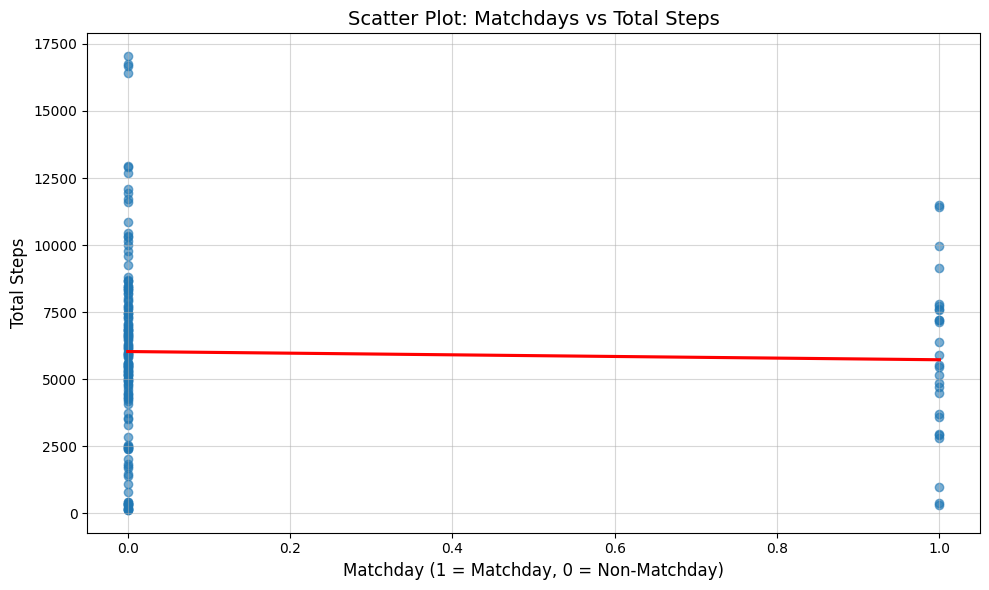

In [3]:
# This script analyzes the relationship between daily step counts and matchdays.
# This analysis tests whether daily step counts are influenced by matchdays and match outcomes. The null hypothesis (H₀) assumes no significant impact, while the alternative hypothesis (H₁) posits that matchdays and outcomes significantly affect step counts, with increased steps on matchdays and more steps following wins than losses. The script processes step count data and match data, identifies matchdays, and merges both datasets. A box plot is generated to compare step counts on matchdays versus non-matchdays, and the combined dataset is saved for further analysis.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, spearmanr, pearsonr

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Calculate observed means
matchday_mean = combined_data[combined_data['Matchday'] == True]['Total Steps'].mean()
non_matchday_mean = combined_data[combined_data['Matchday'] == False]['Total Steps'].mean()
observed_diff = matchday_mean - non_matchday_mean

# Perform ANOVA Test
matchday_steps = combined_data[combined_data['Matchday'] == True]['Total Steps']
non_matchday_steps = combined_data[combined_data['Matchday'] == False]['Total Steps']
anova_result = f_oneway(matchday_steps, non_matchday_steps)

# Output ANOVA Test Results
print(f"ANOVA Test Results: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

# Calculate Spearman and Pearson Correlations
spearman_corr, spearman_pval = spearmanr(combined_data['Matchday'], combined_data['Total Steps'])
pearson_corr, pearson_pval = pearsonr(combined_data['Matchday'], combined_data['Total Steps'])
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value = {spearman_pval:.4f})")
print(f"Pearson Correlation: {pearson_corr:.2f} (p-value = {pearson_pval:.4f})")

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=combined_data['Matchday'].astype(int), y=combined_data['Total Steps'], ci=None, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot: Matchdays vs Total Steps', fontsize=14)
plt.xlabel('Matchday (1 = Matchday, 0 = Non-Matchday)', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The results of the statistical tests indicate no significant relationship between matchdays and daily step counts. The ANOVA test (F-statistic = 0.18, p-value = 0.6713) shows no significant difference in mean step counts between matchdays and non-matchdays. Similarly, the Spearman correlation (-0.02, p-value = 0.7937) and Pearson correlation (-0.03, p-value = 0.6713) both suggest a very weak, non-significant relationship between matchdays and step counts. These findings fail to reject the null hypothesis, supporting the conclusion that matchdays do not significantly impact daily step counts.

Chi-Square Test Results: Chi2 = 0.00, p-value = 1.0000, Degrees of Freedom = 1
Contingency Table:
Step Category  High  Low
Matchday                
False            72   72
True             13   14


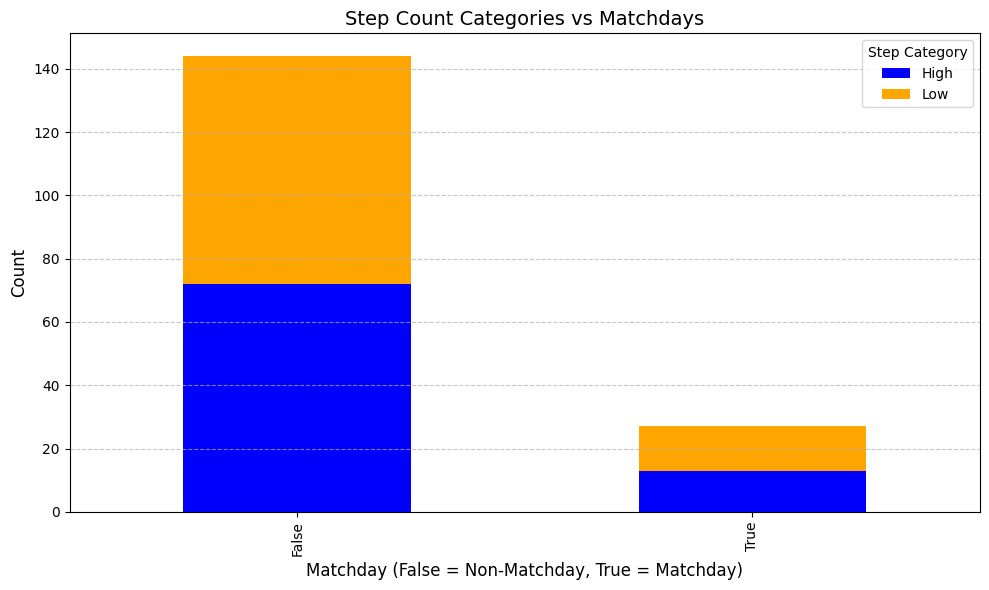

In [7]:
# This script analyzes the relationship between daily step counts and matchdays.
# This analysis tests whether daily step counts are influenced by matchdays and match outcomes. The null hypothesis (H₀) assumes no significant impact, while the alternative hypothesis (H₁) posits that matchdays and outcomes significantly affect step counts, with increased steps on matchdays and more steps following wins than losses. The script processes step count data and match data, identifies matchdays, and merges both datasets. The combined dataset is used to perform a Chi-Square test to evaluate the association between matchdays and step count categories.

# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Perform Chi-Square Test
# Convert Total Steps into categorical data: High or Low steps based on median
step_median = combined_data['Total Steps'].median()
combined_data['Step Category'] = combined_data['Total Steps'].apply(lambda x: 'High' if x > step_median else 'Low')

# Create contingency table
contingency_table = pd.crosstab(combined_data['Matchday'], combined_data['Step Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output Chi-Square Test Results
print(f"Chi-Square Test Results: Chi2 = {chi2:.2f}, p-value = {p:.4f}, Degrees of Freedom = {dof}")
print("Contingency Table:")
print(contingency_table)

# Visualization: Stacked Bar Chart for Contingency Table
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Step Count Categories vs Matchdays', fontsize=14)
plt.xlabel('Matchday (False = Non-Matchday, True = Matchday)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Step Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The Chi-Square test results indicate that there is no significant association between matchdays and step count categories (High or Low). The Chi2 statistic is 0.00, and the p-value of 1.0000 is far above the typical significance level of 0.05, meaning we fail to reject the null hypothesis. The contingency table shows that the proportions of High and Low step counts are almost identical for matchdays and non-matchdays (72 High and 72 Low for non-matchdays, 13 High and 14 Low for matchdays), further supporting the lack of a meaningful relationship. This suggests that whether a day is a matchday or not does not influence whether step counts are categorized as High or Low.

Mann-Whitney U Test Results: U-statistic = 1882.00, p-value = 0.7945


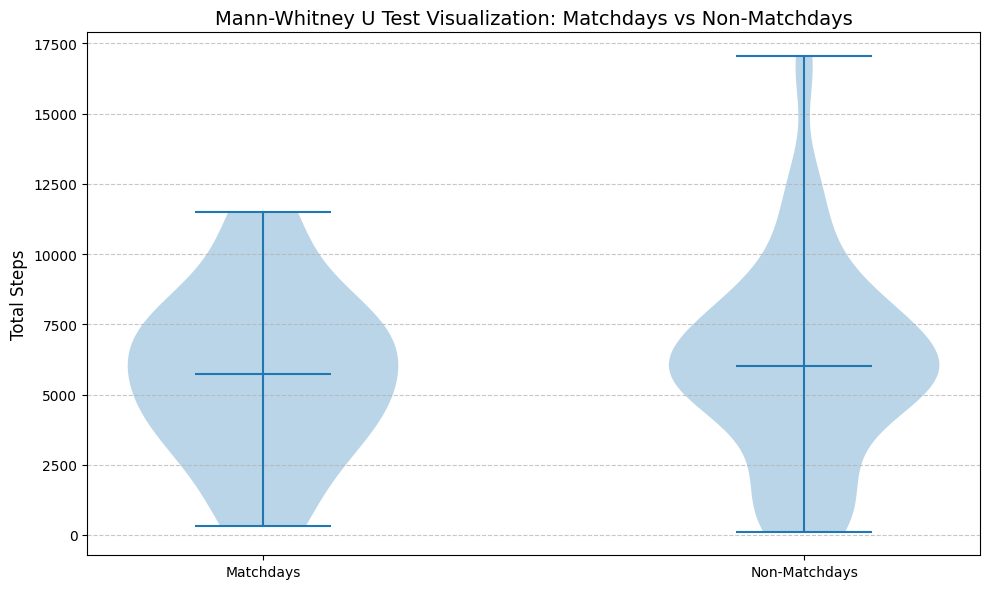

In [10]:
# This script performs a Mann-Whitney U Test to compare the distribution of step counts between matchdays and non-matchdays.

# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

# Load the datasets (upload your CSV files in Google Colab before running this code)
# Step count data
step_count_file = 'step_count.csv'  # Replace with your uploaded file's name
match_data_file = 'match_data.csv'  # Replace with your uploaded file's name

# Load step count data
step_data = pd.read_csv(step_count_file)

# Load match data
match_data = pd.read_csv(match_data_file)

# Convert 'Date' columns to datetime format
step_data['Date'] = pd.to_datetime(step_data['Date'])
match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')

# Add 'Matchday' column to step data
step_data['Matchday'] = step_data['Date'].isin(match_data['Date'])

# Merge datasets to include match details in the step data
combined_data = pd.merge(step_data, match_data, on='Date', how='left')

# Perform Mann-Whitney U Test
matchday_steps = combined_data[combined_data['Matchday'] == True]['Total Steps']
non_matchday_steps = combined_data[combined_data['Matchday'] == False]['Total Steps']
stat, p_value = mannwhitneyu(matchday_steps, non_matchday_steps, alternative='two-sided')

# Output Mann-Whitney U Test Results
print(f"Mann-Whitney U Test Results: U-statistic = {stat:.2f}, p-value = {p_value:.4f}")

# Visualization: Violin Plot for Matchdays vs Non-Matchdays
plt.figure(figsize=(10, 6))
plt.violinplot([matchday_steps, non_matchday_steps], showmeans=True)
plt.xticks([1, 2], ['Matchdays', 'Non-Matchdays'])
plt.title('Mann-Whitney U Test Visualization: Matchdays vs Non-Matchdays', fontsize=14)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The Mann-Whitney U test results indicate no significant difference in the distribution of step counts between matchdays and non-matchdays. The U-statistic of 1882.00 reflects the ranking of the data, and the p-value of 0.7945 is much greater than the typical significance threshold of 0.05. This means we fail to reject the null hypothesis, suggesting that the distribution of step counts does not significantly differ between matchdays and non-matchdays.